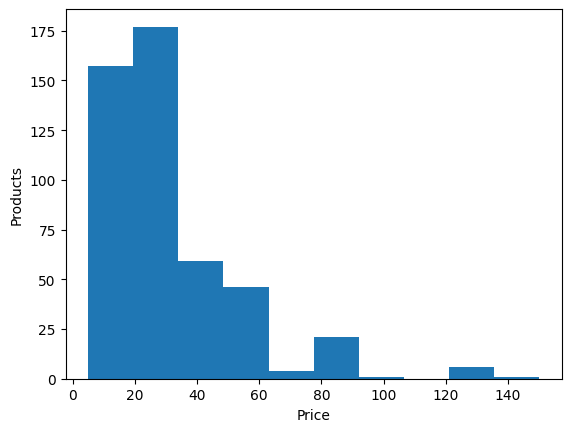

In [23]:
import matplotlib.pyplot as plt
import pandas

STD_PATH = "/workspaces/365-Days-365-projects/February/CANDA_webscraper/listings/all_products.csv"

def getProducts(file_path: str = STD_PATH):
    cleaned_data: dict[str, list[tuple[str, int]]] = {}
    try:
        ds = pandas.read_csv(file_path)
        for _, row in ds.iterrows():
            product_name = str(row.get("title", ""))
            category = str(row.get("category", ""))
            try:
                price = float(row.get("price", "").replace(",", "."))
            except ValueError:
                continue
            if category not in cleaned_data:
                cleaned_data[category] = []
            cleaned_data[category].append((product_name, price))
    except Exception as e:
        print(f"! Error: {e}")
    return cleaned_data

def plotProducts():
    products = getProducts()
    prices = []
    for category in products:
        for _, price in products[category]:
            prices.append(price)
    plt.hist(prices)
    plt.xlabel('Price')
    plt.ylabel('Products')
    plt.show()

plotProducts()